# Car Price

## 1. EDA
- **make**: make of a car (BMW, Toyota, and so on)
- **model**: model of a car
- **year**: year when the car was manufactured
- **engine_fuel_type**: type of fuel the engine needs (diesel, electric, and so on)
- **engine_hp**: horsepower of the engine
- **engine_cylinders**: number of cylinders in the engine
- **transmission_type**: type of transmission (automatic or manual)
- **driven_wheels**: front, rear, all
- **number_of_doors**: number of doors a car has
- **market_category**: luxury, crossover, and so on
- **vehicle_size**: compact, midsize, or large
- **vehicle_style**: sedan or convertible
- **highway_mpg**: miles per gallon (mpg) on the highway
- **city_mpg**: miles per gallon in the city
- **popularity**: number of times the car was mentioned in a Twitter stream
- **msrp** (price): manufacturer’s suggested retail price

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm


In [2]:
df = pd.read_csv('../../input/dataset/car_price.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 1.1. Uniform Column Name & String Column

In [4]:
#Uniform format
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df = df.rename(columns={'msrp': 'price'})

### 1.2. Target Variable

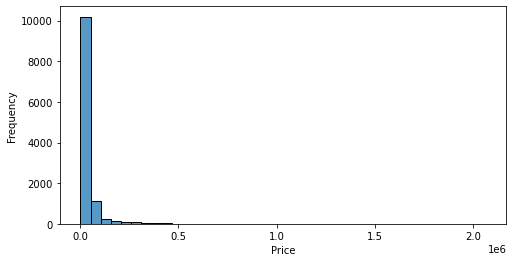

In [36]:
def plot_dist(df, xlabel='Price' ):
    _, ax = plt.subplots(figsize=(8,4))
    sns.histplot(df, bins=40, ax=ax)
    ax.set(ylabel='Frequency', xlabel=xlabel)
    plt.show()
plot_dist(df['price'])

In [ ]:
print(f"Skewness: {df['price'].skew()}")
print(f"Kurtosis: {df['price'].kurt()}")

Skewness: 11.771987129334972
Kurtosis: 268.92627647631605


- **Long tail distribution** (many cars with low prices on the left side, but the number quickly drops, and there’s a long tail of very few cars with high prices)
    - The model, so it won’t learn well enough with this kind of distribution
    - Log transformation: `y_new = log(y+1)` (+1 as log 0 ~ infinite)


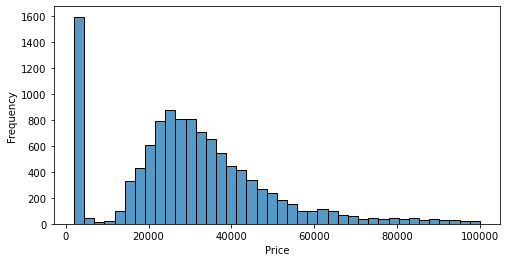

In [23]:
# zoom in by looking at values below $100,000
plot_dist(df['price'][df.price < 100000])

- From above pic, a lot of cars that cost $1,000

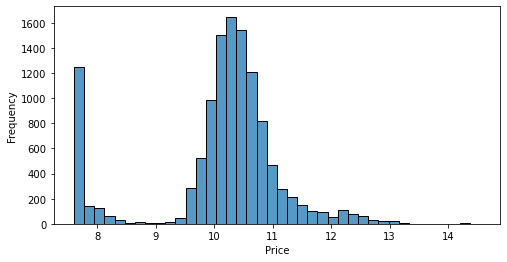

In [25]:
# Taking log(y+1)
plot_dist(np.log1p(df['price']))

- This log transformation removes the long tail, and now the distribution resembles a bell-shaped curve. This distribution is not normal, of course, because of the large peak in lower prices, but the model can deal with it more easily.